<a href="https://colab.research.google.com/github/sol-yb/demo/blob/main/Copy_of_10_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

TRAIN_FILE_ID = "1ngbzJY_om5kPC20z4vMvAW6SuD4WnBDj"
TEST_FILE_ID = "15n2_gY5iLn6cknNr2MauA6A22mGhQiev"
VAR_FILE_ID = "1GVtXv0Ni0pgKyNsv9Sc1cQdYEJ_fQuub"


# return file url from file id
def file_url(file_id):
    return f"https://drive.google.com/uc?id={file_id}"


gdown.download(file_url(TRAIN_FILE_ID), "train.csv", quiet=False)
gdown.download(file_url(TEST_FILE_ID), "test.csv", quiet=False)
gdown.download(file_url(VAR_FILE_ID), "variables.csv", quiet=False)

print("Download completed")

Downloading...
From: https://drive.google.com/uc?id=1ngbzJY_om5kPC20z4vMvAW6SuD4WnBDj
To: /content/train.csv
100%|██████████| 882k/882k [00:00<00:00, 11.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=15n2_gY5iLn6cknNr2MauA6A22mGhQiev
To: /content/test.csv
100%|██████████| 272k/272k [00:00<00:00, 6.03MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GVtXv0Ni0pgKyNsv9Sc1cQdYEJ_fQuub
To: /content/variables.csv
100%|██████████| 1.35k/1.35k [00:00<00:00, 2.89MB/s]

Download completed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
var_df = pd.read_csv("variables.csv")

In [ ]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [ ]:
train_df.shape

(4809, 23)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [ ]:
train_df.isna().sum()

,0
ID,0
country,0
age_group,0
travel_with,1114
total_female,3
total_male,5
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [ ]:
test_df.isna().sum()

,0
ID,0
country,0
age_group,0
travel_with,327
total_female,1
total_male,2
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [ ]:
cat_features = train_df.select_dtypes(include="object").columns.to_list()

cat_features

['ID',
 'country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'payment_mode',
 'first_trip_tz',
 'most_impressing']

In [ ]:
num_features = train_df.select_dtypes(include="number").columns.to_list()

num_features

['total_female',
 'total_male',
 'night_mainland',
 'night_zanzibar',
 'total_cost']

<Axes: >

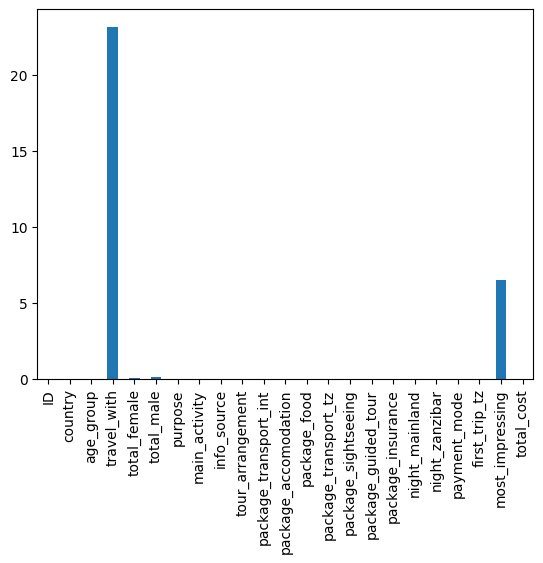

In [ ]:
(train_df.isna().sum() / len(train_df) * 100).plot(kind="bar")

# MIssed

In [ ]:
train_df["total_female"] = train_df["total_female"].fillna(train_df["total_female"].mean())
train_df["total_male"] = train_df["total_male"].fillna(train_df["total_male"].mean())

test_df["total_female"] = test_df["total_female"].fillna(test_df["total_female"].mean())
test_df["total_male"] = test_df["total_male"].fillna(test_df["total_male"].mean())

In [ ]:
train_df.isna().sum()

,0
ID,0
country,0
age_group,0
travel_with,1114
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [ ]:
train_df.travel_with.unique()

array(['Friends/Relatives', nan, 'Alone', 'Spouse', 'Children',
       'Spouse and Children'], dtype=object)

In [ ]:
train_df.travel_with.value_counts()

,count
travel_with,
Alone,1265
Spouse,1005
Friends/Relatives,895
Spouse and Children,368
Children,162


In [ ]:
train_df.travel_with.fillna("missed", inplace=True)
test_df.travel_with.fillna("missed", inplace=True)

<ipython-input-89-091c07789248>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.travel_with.fillna("missed", inplace=True)
<ipython-input-89-091c07789248>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
train_df.travel_with.isna().sum()

np.int64(0)

In [ ]:
train_df.most_impressing.isna().sum()

np.int64(313)

In [ ]:
train_df.most_impressing.value_counts()

,count
most_impressing,
Friendly People,1541
Wildlife,1038
No comments,743
"Wonderful Country, Landscape, Nature",507
Good service,365
Excellent Experience,271
Satisfies and Hope Come Back,31


In [ ]:
mode_value = train_df.most_impressing.mode()[0]

train_df.most_impressing.fillna(mode_value, inplace=True)
test_df.most_impressing.fillna(mode_value, inplace=True)

<ipython-input-93-8e52d3f98b4c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df.most_impressing.fillna(mode_value, inplace=True)
<ipython-input-93-8e52d3f98b4c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
train_df.isna().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [ ]:
mask = train_df.travel_with == "Alone"

mask_total = train_df.total_female + train_df.total_male != 1

train_df[mask & mask_total].head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
1042,tour_2281,GERMANY,45-64,Alone,12.0,3.0,Scientific and Academic,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,14.0,0.0,Credit Card,No,Friendly People,32394685.75
1670,tour_3040,ZIMBABWE,1-24,Alone,0.0,0.0,Business,Beach tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,2.0,0.0,Cash,No,No comments,500000.00
2335,tour_3840,SPAIN,25-44,Alone,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,No,4.0,0.0,Cash,Yes,"Wonderful Country, Landscape, Nature",447525.00
2430,tour_396,AUSTRALIA,1-24,Alone,0.0,0.0,Leisure and Holidays,Hunting tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,15.0,5.0,Cash,Yes,Friendly People,11027030.00
3377,tour_5083,ITALY,25-44,Alone,2.0,2.0,Leisure and Holidays,business,"Friends, relatives",Package Tour,...,Yes,No,No,No,0.0,11.0,Cash,No,Wildlife,2269330.00


In [ ]:
train_df.loc[mask, "total_female"] = 0
train_df.loc[mask, "total_male"] = 1

In [ ]:
train_df[mask & mask_total].head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
1042,tour_2281,GERMANY,45-64,Alone,0.0,1.0,Scientific and Academic,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,14.0,0.0,Credit Card,No,Friendly People,32394685.75
1670,tour_3040,ZIMBABWE,1-24,Alone,0.0,1.0,Business,Beach tourism,"Newspaper, magazines,brochures",Independent,...,No,No,No,No,2.0,0.0,Cash,No,No comments,500000.00
2335,tour_3840,SPAIN,25-44,Alone,0.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,Yes,No,4.0,0.0,Cash,Yes,"Wonderful Country, Landscape, Nature",447525.00
2430,tour_396,AUSTRALIA,1-24,Alone,0.0,1.0,Leisure and Holidays,Hunting tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,15.0,5.0,Cash,Yes,Friendly People,11027030.00
3377,tour_5083,ITALY,25-44,Alone,0.0,1.0,Leisure and Holidays,business,"Friends, relatives",Package Tour,...,Yes,No,No,No,0.0,11.0,Cash,No,Wildlife,2269330.00


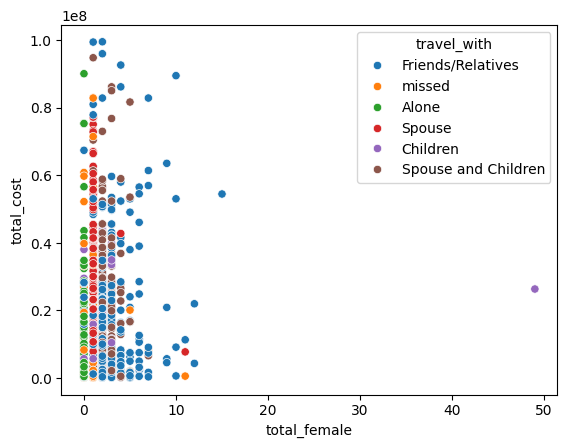

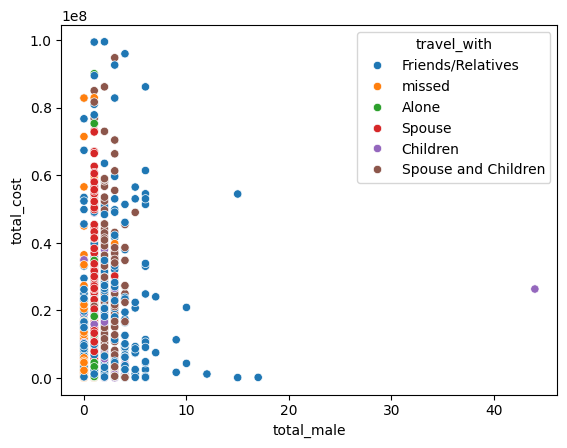

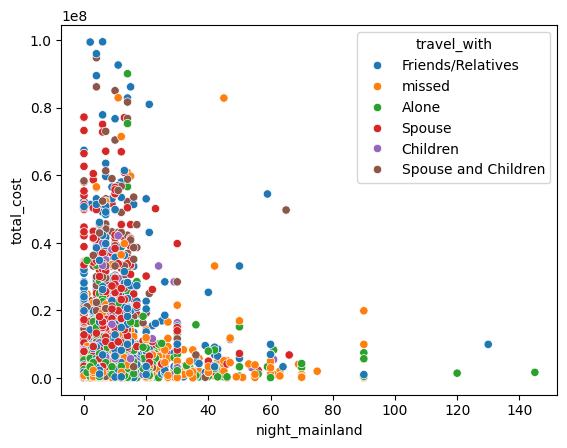

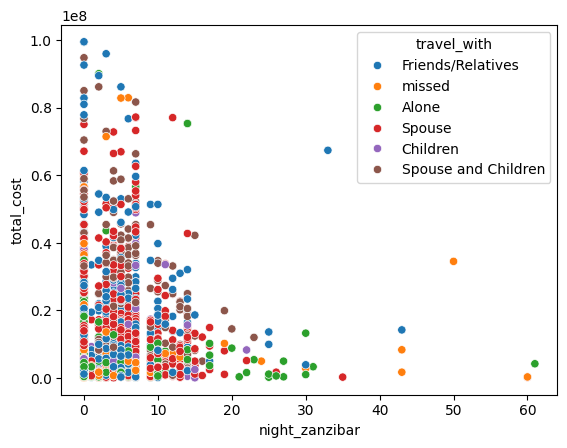

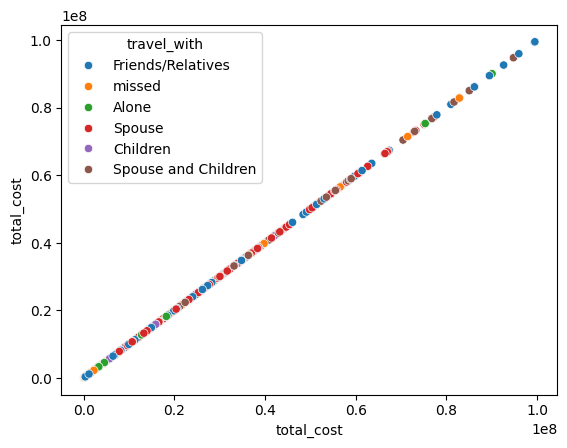

In [ ]:
for col in num_features:
    sns.scatterplot(
        data=train_df,
        x =col,
        y="total_cost",
        hue="travel_with",
    )
    plt.show()

In [ ]:
test_df["age_group"].value_counts()

,count
age_group,
25-44,866
45-64,447
1-24,202
65+,86


In [ ]:
mask = test_df["age_group"] == "24-Jan"

test_df.loc[mask, "age_group"] = "1-24"

In [ ]:
train_df["age_group"].value_counts()

,count
age_group,
25-44,2487
45-64,1391
1-24,624
65+,307


In [ ]:
cat_features.remove("ID")

In [ ]:
merge_df = pd.concat([train_df, test_df], axis=0)

merge_df.shape

(6410, 23)

In [ ]:
cat_features

for col in cat_features:
    if merge_df[col].nunique() < 10:
      merge_df= pd.get_dummies(merge_df, columns=[col], drop_first=True)

In [ ]:
merge_df.shape

(6410, 54)

In [ ]:
merge_df.columns

Index(['ID', 'country', 'total_female', 'total_male', 'night_mainland',
       'night_zanzibar', 'total_cost', 'age_group_25-44', 'age_group_45-64',
       'age_group_65+', 'travel_with_Children',
       'travel_with_Friends/Relatives', 'travel_with_Spouse',
       'travel_with_Spouse and Children', 'travel_with_missed',
       'purpose_Leisure and Holidays', 'purpose_Meetings and Conference',
       'purpose_Other', 'purpose_Scientific and Academic',
       'purpose_Visiting Friends and Relatives', 'purpose_Volunteering',
       'main_activity_Bird watching', 'main_activity_Conference tourism',
       'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'main_activity_business',
       'info_source_Newspaper, magazines,brochures',
       'info_source_Radio, TV, Web', 'info_source_Tanzania Mission Abroad',
       'info_source_Trade fair', 'in

In [ ]:
merge_df.select_dtypes(include="object").columns

Index(['ID', 'country'], dtype='object')

In [ ]:
#label coding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

merge_df["country"]=le.fit_transform(merge_df["country"])

In [ ]:
merge_df.select_dtypes(include="object").columns

Index(['ID'], dtype='object')

In [ ]:
merge_df.shape

(6410, 54)

In [ ]:
train_df=merge_df[merge_df["total_cost"].isna()==False].copy()
test_df=merge_df[merge_df["total_cost"].isna()==True].copy()

In [ ]:
test_df.shape

(1601, 54)

In [ ]:
test_df.total_cost

,total_cost
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1596,NaN
1597,NaN
1598,NaN
1599,NaN


In [ ]:
from sklearn.model_selection import train_test_split

x=train_df.drop(columns=["total_cost","ID"])
y=train_df["total_cost"]

x.shape,y.shape

((4809, 52), (4809,))

In [ ]:
x_train,x_test,y_train,y_test

(      country  total_female  total_male  night_mainland  night_zanzibar  \
 402       100          10.0         2.0            21.0             0.0   
 4543       99           1.0         1.0             6.0             7.0   
 3541       99           1.0         0.0            26.0             2.0   
 2377      104           0.0         1.0             7.0             0.0   
 4584       99           1.0         1.0             6.0             0.0   
 ...       ...           ...         ...             ...             ...   
 4426       96           0.0         1.0            60.0             0.0   
 466        99           6.0         6.0             7.0             0.0   
 3092       44           0.0         1.0            10.0             0.0   
 3772      104           0.0         1.0             1.0             0.0   
 860       100           1.0         1.0             6.0             0.0   
 
       age_group_1-24  age_group_25-44  age_group_45-64  age_group_65+  \
 402        

In [ ]:
#model for lenear regression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# XGBoost (often the best for structured data)
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred=lr_model.predict(x_test)

mae=mean_absolute_error(y_test,y_pred)
print(mae)

5494496.065745835


In [ ]:
x_train.columns

Index(['country', 'total_female', 'total_male', 'night_mainland',
       'night_zanzibar', 'age_group_25-44', 'age_group_45-64', 'age_group_65+',
       'travel_with_Children', 'travel_with_Friends/Relatives',
       'travel_with_Spouse', 'travel_with_Spouse and Children',
       'travel_with_missed', 'purpose_Leisure and Holidays',
       'purpose_Meetings and Conference', 'purpose_Other',
       'purpose_Scientific and Academic',
       'purpose_Visiting Friends and Relatives', 'purpose_Volunteering',
       'main_activity_Bird watching', 'main_activity_Conference tourism',
       'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'main_activity_business',
       'info_source_Newspaper, magazines,brochures',
       'info_source_Radio, TV, Web', 'info_source_Tanzania Mission Abroad',
       'info_source_Trade fair', 'info_source_Travel, ag

In [ ]:
test_df.columns

Index(['ID', 'country', 'total_female', 'total_male', 'night_mainland',
       'night_zanzibar', 'total_cost', 'age_group_25-44', 'age_group_45-64',
       'age_group_65+', 'travel_with_Children',
       'travel_with_Friends/Relatives', 'travel_with_Spouse',
       'travel_with_Spouse and Children', 'travel_with_missed',
       'purpose_Leisure and Holidays', 'purpose_Meetings and Conference',
       'purpose_Other', 'purpose_Scientific and Academic',
       'purpose_Visiting Friends and Relatives', 'purpose_Volunteering',
       'main_activity_Bird watching', 'main_activity_Conference tourism',
       'main_activity_Cultural tourism',
       'main_activity_Diving and Sport Fishing',
       'main_activity_Hunting tourism', 'main_activity_Mountain climbing',
       'main_activity_Wildlife tourism', 'main_activity_business',
       'info_source_Newspaper, magazines,brochures',
       'info_source_Radio, TV, Web', 'info_source_Tanzania Mission Abroad',
       'info_source_Trade fair', 'in

In [ ]:
test_pred = lr_model.predict(test_df[x_train.columns])

test_pred

array([17821287.74496981,  8028409.78442403,  7094453.75814901, ...,
       -1750843.78263468, -1815222.32989456,  3349104.80442374])

In [ ]:
submission_df=pd.DataFrame({"ID":test_df["ID"],"total_cost":test_pred})
submission_df.head()

,ID,total_cost
0,tour_1,1.782129e+07
1,tour_100,8.028410e+06
2,tour_1001,7.094454e+06
3,tour_1006,2.687568e+06
4,tour_1009,1.742008e+07


In [ ]:
submission_df.to_csv("submission.csv",index=False)